### Regression

In [21]:
# default modules
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple, Callable, Union
%matplotlib inline
import os
import pickle
import shelve
import functools
import time
import logging
import pprint
import re
import itertools

import warnings
warnings.simplefilter('ignore')

In [22]:
from scipy import stats
import scipy

In [23]:
# regression modules
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# model selection/evaluaiton
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [24]:
# pre-processing modules
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

In [25]:
def dict2array(items) -> Tuple[np.array, np.array]:
    array = np.array(list(items))
    return array.reshape(len(items), 1)

In [26]:
def get_reg_metrics(y_true, pred, pred_nm) -> List[str]:
    """
    return a list of formatted regression metrics
    """
    r2 = r2_score(y, pred).round(3)
    rmse = np.sqrt(mean_squared_error(y, pred)).round(3)
    mae = mean_absolute_error(y, pred).round(3)
    return [
        f'pred_nm: {pred_nm}',
        f'r2: {r2}',
        f'rmse: {rmse}',
        f'mae: {mae}', 
        f'std_y: {round(np.std(y), 3)}', 
        f'std_pred: {round(np.std(pred), 3)}', f'rmse/std_y: {round(rmse/np.std(pred), 3)}',
           ]

def show_padded_matrix(data: List[List], padding=2) -> None:
    """
    print a padded matrix of a list of lists where each list is a row
    """
    col_lens = [max((len(word) + padding for word in row)) for row in list(zip(*data))]
    for row in metrics:
        row_padded = [word.ljust(ln) for word, ln in zip(row, col_lens)]
        print(''.join(row_padded))

In [27]:
# creating toy data
data = {x: 5 + x**2 for x in range(11)}
data = {k: v/10 for k, v in data.items()}
avg = [np.mean(list(data.values())) for i in data]
test =  [1 + 1.2*x for x in data.keys()]

df = pd.DataFrame(list(data.items()), columns=['x', 'y'])
X, y = df[['x']], df['y']

In [28]:
# fitting a linear model
lm = LinearRegression()
lm.fit(X, y)
pred = lm.predict(X)

X['x2'] = X ** 2
lm.fit(X, y)
pred_d2 = lm.predict(X)

In [29]:
# at any given point it could be 11% of the values
# at any given point it could be around 30% of the values
preds = {'pred': pred, 'avg': avg, 'test': test, 'pred_d2': pred_d2}
metrics = [get_reg_metrics(y, v_pred, k_nm) for k_nm, v_pred in preds.items()]
show_padded_matrix(metrics)

pred_nm: pred     r2: 0.928  rmse: 0.883  mae: 0.764  std_y: 3.283  std_pred: 3.162  rmse/std_y: 0.279  
pred_nm: avg      r2: 0.0    rmse: 3.283  mae: 2.818  std_y: 3.283  std_pred: 0.0    rmse/std_y: inf    
pred_nm: test     r2: 0.056  rmse: 3.191  mae: 3.0    std_y: 3.283  std_pred: 3.795  rmse/std_y: 0.841  
pred_nm: pred_d2  r2: 1.0    rmse: 0.0    mae: 0.0    std_y: 3.283  std_pred: 3.283  rmse/std_y: 0.0    


In [30]:
x_array = dict2array(data.keys())
y_array = dict2array(data.values())

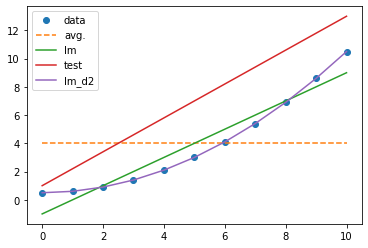

In [31]:
plt.plot(x_array, y_array, ls='none', marker='o', label='data')
plt.plot(x_array, avg, ls='--', label='avg.')
plt.plot(x_array, pred, label='lm')
plt.plot(x_array, test, label='test')
plt.plot(x_array, pred_d2, label='lm_d2')
plt.legend()

In [32]:
# justifying the 68, 95, 99.7 rule
std = np.std(y)
avg_ = np.mean(y)
rang = [avg_ - std, avg_ + std]
cond = (y > rang[0]) & (y < rang[1])
y_filt = y[cond]
y_filt.shape[0] / y.shape[0]

0.6363636363636364

In [33]:
rang = [avg_ - 2*std, avg_ + 2*std]
cond = (y > rang[0]) & (y < rang[1])
y_filt = y[cond]
y_filt.shape[0] / y.shape[0]

1.0

#### Again but with feature scalling

In [34]:
# creating toy data
data = {x: 5 + x**2 for x in range(11)}
data = {k: v/10 for k, v in data.items()}
test =  [-0.5 + 0.12*x for x in data.keys()]

df = pd.DataFrame(list(data.items()), columns=['x', 'y'])
X, y = df[['x']], df[['y']]


In [35]:
# feature scaling
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)
avg = [X.mean() for i in range(X.shape[0])]

In [36]:
# fitting a linear model
lm = LinearRegression()
lm.fit(X, y)
pred = lm.predict(X)

X = pd.DataFrame(X, columns=['x'])
X['x2'] = X ** 2
lm.fit(X, y)
pred_d2 = lm.predict(X)

In [37]:
# at any given point the linear reg could be 11% of the values
# at any given point the random linear line could be around 30% of the values
preds = {'pred': pred, 'avg': avg, 'test': test, 'pred_d2': pred_d2}
metrics = [get_reg_metrics(y, v_pred, k_nm) for k_nm, v_pred in preds.items()]
show_padded_matrix(metrics)

pred_nm: pred     r2: 0.928  rmse: 0.269  mae: 0.233  std_y: 1.0  std_pred: 0.963  rmse/std_y: 0.279                  
pred_nm: avg      r2: 0.0    rmse: 1.0    mae: 0.858  std_y: 1.0  std_pred: 0.0    rmse/std_y: 8.112963841460668e+31  
pred_nm: test     r2: 0.577  rmse: 0.65   mae: 0.575  std_y: 1.0  std_pred: 0.379  rmse/std_y: 1.713                  
pred_nm: pred_d2  r2: 1.0    rmse: 0.0    mae: 0.0    std_y: 1.0  std_pred: 1.0    rmse/std_y: 0.0                    


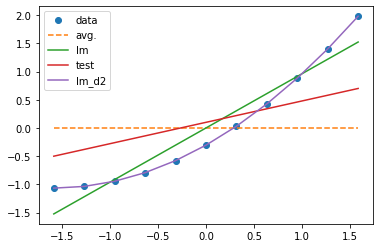

In [38]:
plt.plot(X['x'], y, ls='none', marker='o', label='data')
plt.plot(X['x'], avg, ls='--', label='avg.')
plt.plot(X['x'], pred, label='lm')
plt.plot(X['x'], test, label='test')
plt.plot(X['x'], pred_d2, label='lm_d2')
plt.legend()

In [39]:
# justifying the 68, 95, 99.7 rule
std = np.std(y)
avg_ = np.mean(y)
rang = [avg_ - std, avg_ + std]
cond = (y > rang[0]) & (y < rang[1])
y_filt = y[cond]
y_filt.shape[0] / y.shape[0]

0.6363636363636364

In [40]:
rang = [avg_ - 2*std, avg_ + 2*std]
cond = (y > rang[0]) & (y < rang[1])
y_filt = y[cond]
y_filt.shape[0] / y.shape[0]

1.0

### Confidence intervals and prediction intervals

In [41]:
class Relationship:
    """
    
    """
    def __init__(self, points=50):
        self.points = points
        self.x = np.arange(self.points).reshape(-1,1)

    @property
    def y(self):        
        y = 4 + self.x**2 + self.x**3 + self.x**4
        y = y / y.max()
        y = y + np.random.normal(0, .1, self.points).reshape(-1,1) + 3
        return y.reshape(-1,1)

    @property
    def x_const(self):
        return np.hstack((np.ones(50).reshape(-1,1), self.x.reshape(-1,1)))
    
    @property
    def x_poly(self):
        return np.hstack((self.x_const, self.x ** 2))
    
    @property
    def model(self):
        return sm.OLS(self.y, self.x_const).fit()
    
    @property
    def poly_model(self):
        return sm.OLS(self.y, self.x_poly).fit()
    
    @property
    def ci(self):
        st, data, ss2 = summary_table(self.model)
        mean_ci_low, mean_ci_upp = data[:,4:6].T
        ci_low, ci_upp = data[:,6:8].T
        return (mean_ci_low, mean_ci_upp, ci_low, ci_upp)
    
    @property
    def ci_poly(self):
        st, data, ss2 = summary_table(self.poly_model)
        mean_ci_low, mean_ci_upp = data[:,4:6].T
        ci_low, ci_upp = data[:,6:8].T
        return (mean_ci_low, mean_ci_upp, ci_low, ci_upp)
    
    def plot_xy(self):
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.scatter(self.x, self.y, label='points')
        ax.plot(self.x, self.model.predict(self.x_const), label='linear')
        ax.plot(self.x, self.poly_model.predict(self.x_poly), label='poly')
        
#         ax.plot(self.x, self.ci[0], label='mean_ci_low', c='green', ls='--')
#         ax.plot(self.x, self.ci[1], label='mean_ci_upp', c='green', ls='--')
#         ax.plot(self.x, self.ci[2], label='pred_ci_low', c='purple', ls='--')
#         ax.plot(self.x, self.ci[3], label='pred_ci_upp', c='purple', ls='--')
        
        ax.plot(self.x, self.ci_poly[0], label='mean_ci_low', c='green', ls='--')
        ax.plot(self.x, self.ci_poly[1], label='mean_ci_upp', c='green', ls='--')
        ax.plot(self.x, self.ci_poly[2], label='pred_ci_low', c='purple', ls='--')
        ax.plot(self.x, self.ci_poly[3], label='pred_ci_upp', c='purple', ls='--')
        return (fig, ax)

In [42]:
from statsmodels.stats.outliers_influence import summary_table

(<Figure size 576x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c9b6906a08>)

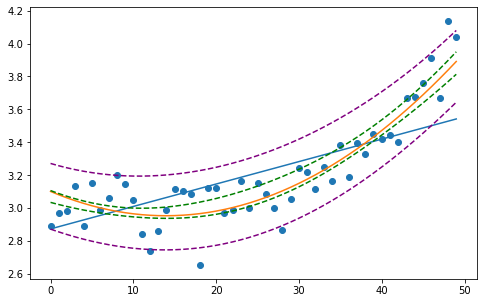

In [43]:
relation = Relationship()

relation.plot_xy()

In [44]:
relation.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     98.88
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           3.04e-13
Time:                        15:52:21   Log-Likelihood:                 17.185
No. Observations:                  50   AIC:                            -30.37
Df Residuals:                      48   BIC:                            -26.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7934      0.049     57.242      0.000       2.695       2.892
x1             0.0171      0.002      9.944      0.000       0.014       0.021
==============================================================================
Omnibus:                        1.884   Durbin-Watson:                   0.607
Prob(Omnibus):                  0.390   Jarque-Bera (JB):                1.793
Skew:                           0.381   Prob(JB):                        0.408
Kurtosis:                       2.470   Cond. No.                         56.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
relation.poly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     199.3
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           1.10e-23
Time:                        15:52:21   Log-Likelihood:                 46.718
No. Observations:                  50   AIC:                            -87.44
Df Residuals:                      47   BIC:                            -81.70
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0638      0.040     76.623      0.000       2.983       3.144
x1            -0.0151      0.004     -4.013      0.000      -0.023      -0.008
x2             0.0007   7.45e-05      8.860      0.000       0.001       0.001
==============================================================================
Omnibus:                        0.244   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.188
Skew:                          -0.138   Prob(JB):                        0.910
Kurtosis:                       2.882   Cond. No.                     3.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
from statsmodels.tools import eval_measures

In [48]:
mod = relation.poly_model

In [50]:
mod.conf_int()

array([[ 3.00517821e+00,  3.17370087e+00],
       [-2.94206124e-02, -1.35146740e-02],
       [ 6.18192025e-04,  9.32107356e-04]])

In [49]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           5.90e-23
Time:                        15:53:04   Log-Likelihood:                 44.398
No. Observations:                  50   AIC:                            -82.80
Df Residuals:                      47   BIC:                            -77.06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0894      0.042     73.760      0.000       3.005       3.174
x1            -0.0215      0.004     -5.430      0.000      -0.029      -0.014
x2             0.0008    7.8e-05      9.935      0.000       0.001       0.001
==============================================================================
Omnibus:                        0.248   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.883   Jarque-Bera (JB):                0.216
Skew:                          -0.145   Prob(JB):                        0.898
Kurtosis:                       2.860   Cond. No.                     3.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""